In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#### Load Dataset

In [3]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


#### Summary Statistics and Missing Value Report

In [5]:
# Summary statistics - numeric
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
# Missing value count
missing_report = df.isna().sum()
print(missing_report)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
missing_percent = (missing_report / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_report, 'Missing %': missing_percent})
missing_df[missing_df['Missing %'] > 5]  # Highlight columns with >5% missing

,Missing Count,Missing %
Comments,525600,100.0


#### Outlier Detection and Basic Cleaning

##### Z-score for outliers

In [8]:
from scipy.stats import zscore

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)
df_outliers = df[outliers.any(axis=1)]
print(f"Outliers count: {len(df_outliers)}")


Outliers count: 9251


##### Drop or Impute Missing Values

In [9]:
# Drop rows with missing GHI/DNI/DHI or fill using median
for col in columns_to_check:
    df[col] = df[col].fillna(df[col].median())

##### Export Cleaned Data

In [10]:
df.to_csv('../data/togo-dapaong_qc_clean.csv',index=False)

#### Timeseries Analysis

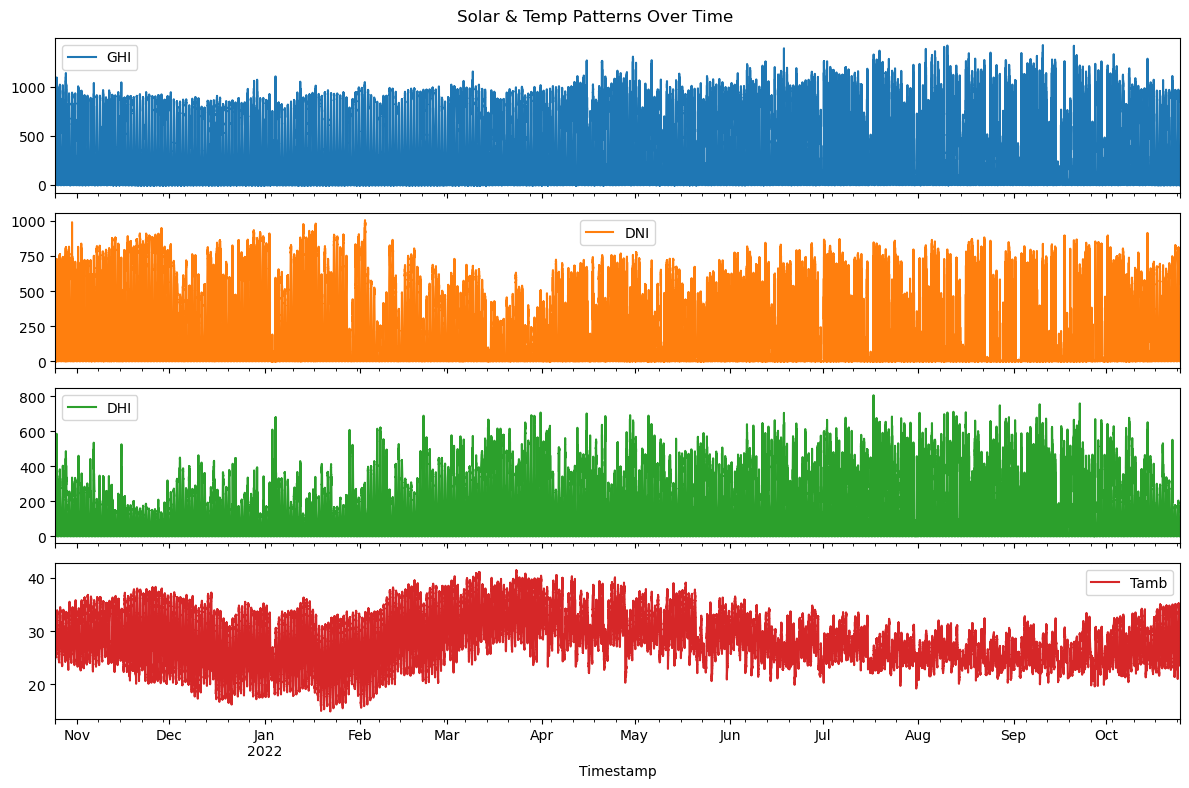

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8), title='Solar & Temp Patterns Over Time')
plt.tight_layout()
plt.show()

#### Cleaning Impact

In [12]:
# Compare sensor data before and after cleaning
df['Cleaning'] = df['Cleaning'].fillna(0)
df['Cleaning'] = df['Cleaning'].astype(int)

pre_clean = df[df['Cleaning'] == 0][['ModA', 'ModB']].mean()
post_clean = df[df['Cleaning'] == 1][['ModA', 'ModB']].mean()

print("Pre-clean average:")
print(pre_clean)
print()
print("Post-clean average:")
print(post_clean)


Pre-clean average:
ModA    225.979064
ModB    219.401351
dtype: float64

Post-clean average:
ModA    535.186477
ModB    532.211744
dtype: float64


#### Correlation and Rekationship Analysis

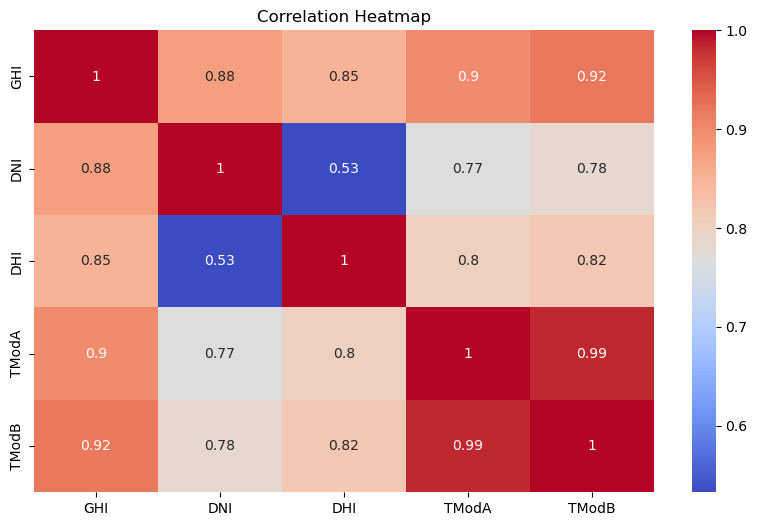

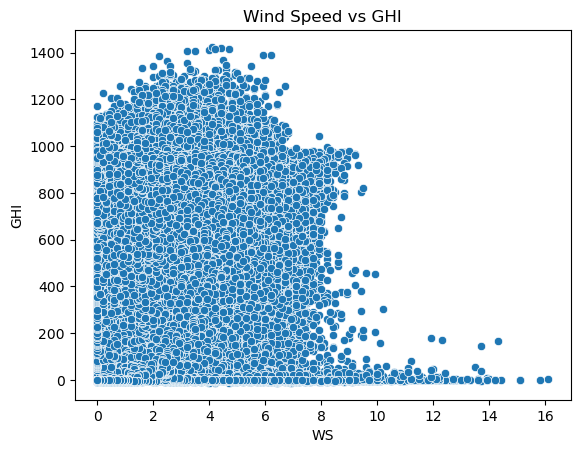

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: Wind speed vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("Wind Speed vs GHI")
plt.show()


##### Wind and Distribution Analysis

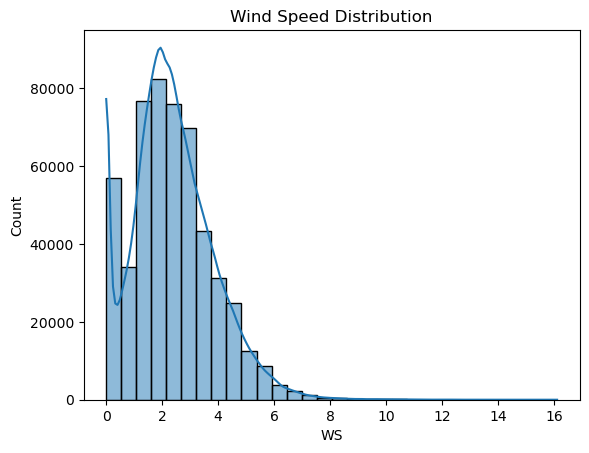

In [14]:
# Wind histograms
sns.histplot(df['WS'], bins=30, kde=True)
plt.title("Wind Speed Distribution")
plt.show()

##### Temperature and Humidity Analysis

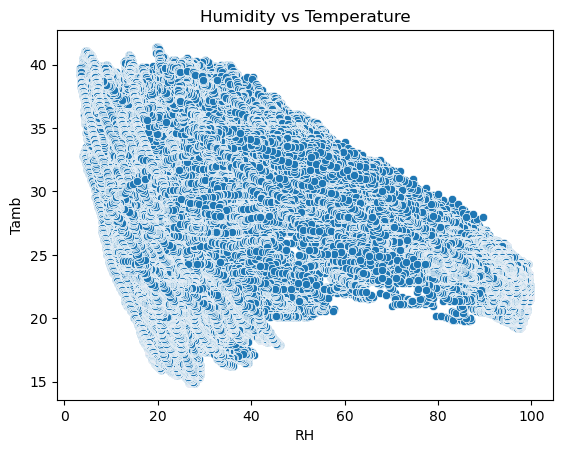

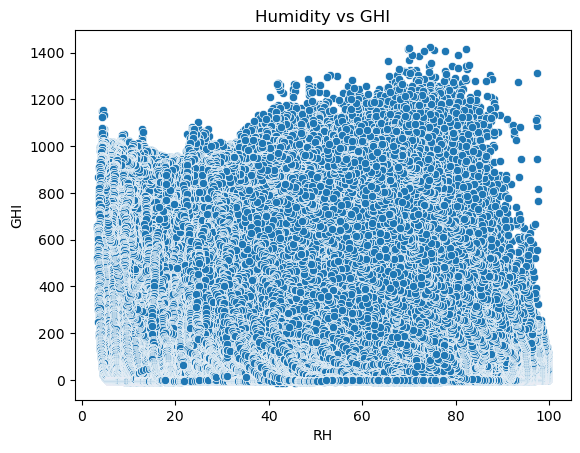

In [15]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Humidity vs Temperature")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df)
plt.title("Humidity vs GHI")
plt.show()

##### Bubble Chart

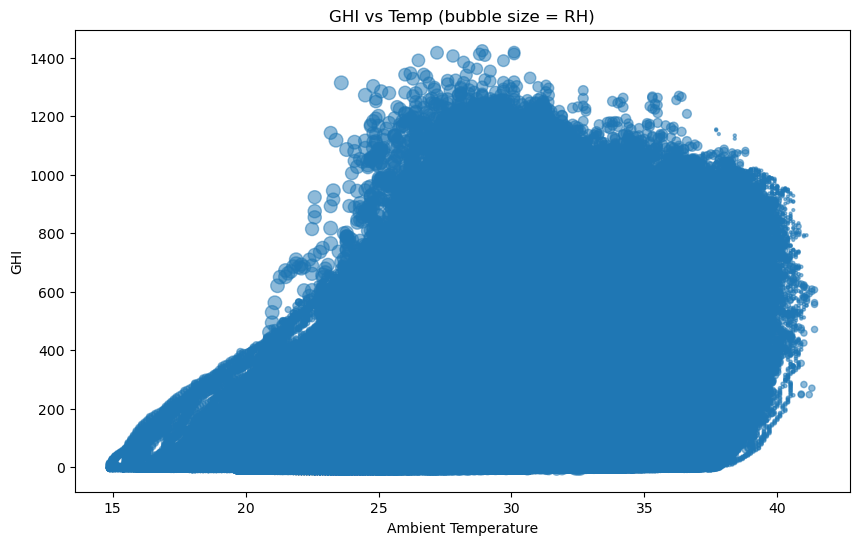

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
plt.xlabel('Ambient Temperature')
plt.ylabel('GHI')
plt.title('GHI vs Temp (bubble size = RH)')
plt.show()